# Inertial + Floorplan Localization Using CRF

## Paper

This implementation is based on the researches done on the following papers,

[1]	Z. Xiao, H. Wen, A. Markham, και N. Trigoni, ‘Lightweight map matching for indoor localisation using conditional random fields’, στο IPSN-14 proceedings of the 13th international symposium on information processing in sensor networks, 2014, σσ. 131–142.

[2]	J. Zhang, M. Ren, P. Wang, J. Meng, και Y. Mu, ‘Indoor localization based on VIO system and three-dimensional map matching’, Sensors, τ. 20, τχ. 10, σ. 2790, 2020.


Note that due to unavailability of exact dataset used for above researchers, I had to use following dataset and convert that according to that.

## Theory

In this notebook, I am going to implement indoor localization mechanism using Linear Chain Conditional Random Fields. By using this model we can predict location of a user when starting position, IMU observations (velocity vectors) and floorplan of the building is given.

### Overall Architecture

Here is the overall system architecture

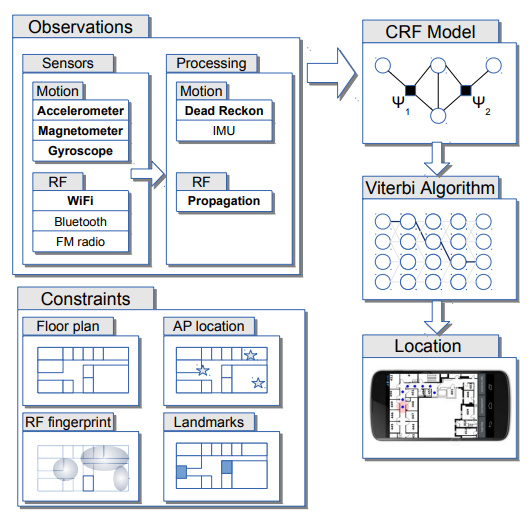

The input is a velocity vector observed using IMU data Z = {Z0,...,ZT }, and the task is to predict a sequence of states S = {S0,...,ST } given input Z.

### Viterbi Algorithm

We use Viterbi algorithm, which can dynamically solve the optimal state points sequence that is most likely to produce the currently given observation value sequence. The solution steps of Viterbi algorithm are as follows:

(1) Initialization: Compute the non-normalized probability of the first position for all states, where m is the number of states.

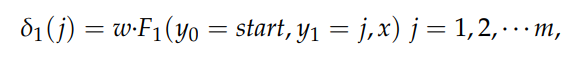

(2) Recursion: Iterate through each state from front to back, find the maximum value of the non-normalized probability of each state l = 1, 2, · · · , m at position i = 2, 3, · · · , n, and record the state sequence label Ψi(l) with the highest probability.

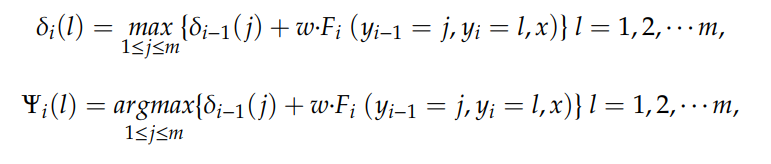

(3) When i = n, we obtain the maximum value of the non-normalized probability and the terminal
of the optimal state points sequence

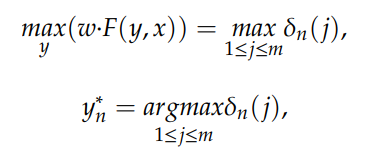

(4) Calculate the final state points output sequence

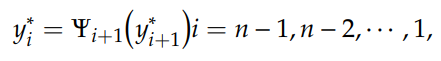

(5) Finally, the optimal sequence of state points is as follows:

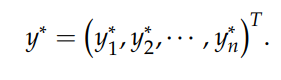

### Defined F and W

We can use w and F(y, x) to represent the weight vector and the global state transfer function vector.

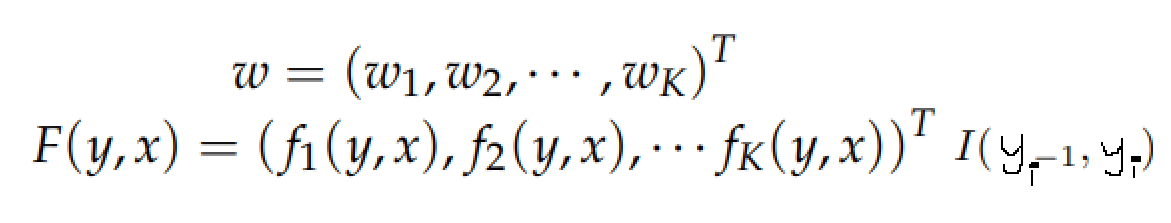

where I(Yt−1, Yt) is an indicator function equal to 1 when states Yt−1 and Yt are connected and 0 otherwise.

We use two functions f1 anf f2

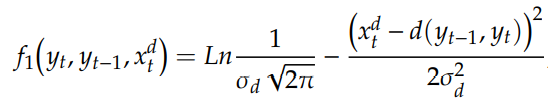

where xdt is the Euclidean distance between two consecutive observations, d(yt−1, yt) is the Euclidean distance between two consecutive state points, and σ2d is the variance of the distance in the observation data.

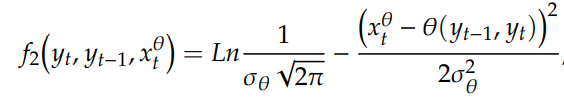

where xθt is the orientation of two consecutive observations, θ(yt−1, yt) is the orientation between two consecutive state points, and σ2θ is the variance of the orientation in the observation data.